In [7]:
import sys

# Upgrade pip
!{sys.executable} -m pip install --upgrade pip

# Install latest compatible TensorFlow
!{sys.executable} -m pip install tensorflow==2.20.0

print("Installation complete. Restart kernel now.")



   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/332.0 MB 6.8 MB/s eta 0:00:49
   ---------------------------------------- 1.8/332.0 MB 5.9 MB/s eta 0:00:56
   ---------------------------------------- 3.1/332.0 MB 6.0 MB/s eta 0:00:55
    --------------------------------------- 4.2/332.0 MB 5.1 MB/s eta 0:01:04
    --------------------------------------- 4.5/332.0 MB 4.6 MB/s eta 0:01:11
    --------------------------------------- 5.0/332.0 MB 4.2 MB/s eta 0:01:18
    --------------------------------------- 5.8/332.0 MB 3.9 MB/s eta 0:01:24
    --------------------------------------- 6.0/332.0 MB 3.7 MB/s eta 0:01:27
    --------------------------------------- 6.6/332.0 MB 3.5 MB/s eta 0:01:34
    --------------------------------------- 7.1/332.0 MB 3.4 MB/s eta 0:01:37
    --------------------------------------- 7.9/332.0 MB 3.3 MB/s eta 0:01:38
   - -------------------------------------- 8.4/332.0 MB 3.3 MB/s eta 

In [9]:
!pip install opencv-python


   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
    --------------------------------------- 0.5/40.2 MB 3.5 MB/s eta 0:00:12
   - -------------------------------------- 1.3/40.2 MB 3.8 MB/s eta 0:00:11
   -- ------------------------------------- 2.6/40.2 MB 4.6 MB/s eta 0:00:09
   --- ------------------------------------ 3.9/40.2 MB 4.9 MB/s eta 0:00:08
   ---- ----------------------------------- 4.7/40.2 MB 4.6 MB/s eta 0:00:08
   ----- ---------------------------------- 5.2/40.2 MB 4.4 MB/s eta 0:00:08
   ----- ---------------------------------- 6.0/40.2 MB 4.1 MB/s eta 0:00:09
   ------ --------------------------------- 6.6/40.2 MB 4.0 MB/s eta 0:00:09
   ------- -------------------------------- 7.3/40.2 MB 4.0 MB/s eta 0:00:09
   -------- ------------------------------- 8.4/40.2 MB 3.9 MB/s eta 0:00:09
   --------- ------------------------------ 9.2/40.2 MB 4.0 MB/s eta 0:00:08
   ---------- ----------------------------- 10.2/40.2 MB 4.0 MB/s eta 0:00:08
   --

In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os


In [3]:
#Define the directory path
data_dir = r"C:\Users\INDU\OneDrive\Music\dataset2-master\dataset2-master\images\TRAIN"
#Define the class Labels 
class_labels = ['eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']

In [4]:
#Initialize lists to hold file paths and Labels
filepaths = []
labels = []
# Loop through each class directory and gather file paths and Labels
for label in class_labels:
    class_dir = os.path.join(data_dir, label)
    for file in os.listdir(class_dir):
        if file.endswith(".jpeg") or file.endswith(".png"):
            # Ensure file is an image
            filepaths.append(os.path.join(class_dir, file))
            labels.append(label)

In [5]:
import pandas as pd


In [6]:
# Create a DataFrame from the file paths and Labels
bloodCell_df = pd.DataFrame({
'filepaths': filepaths,
'labels': labels
})

In [7]:
# Shuffle the DataFrame
bloodCell_df = bloodCell_df.sample(frac=1).reset_index(drop=True)

In [8]:
bloodCell_df.head()

,filepaths,labels
0,C:\Users\INDU\OneDrive\Music\dataset2-master\d...,neutrophil
1,C:\Users\INDU\OneDrive\Music\dataset2-master\d...,lymphocyte
2,C:\Users\INDU\OneDrive\Music\dataset2-master\d...,neutrophil
3,C:\Users\INDU\OneDrive\Music\dataset2-master\d...,eosinophil
4,C:\Users\INDU\OneDrive\Music\dataset2-master\d...,neutrophil


Found 9957 images belonging to 4 classes.


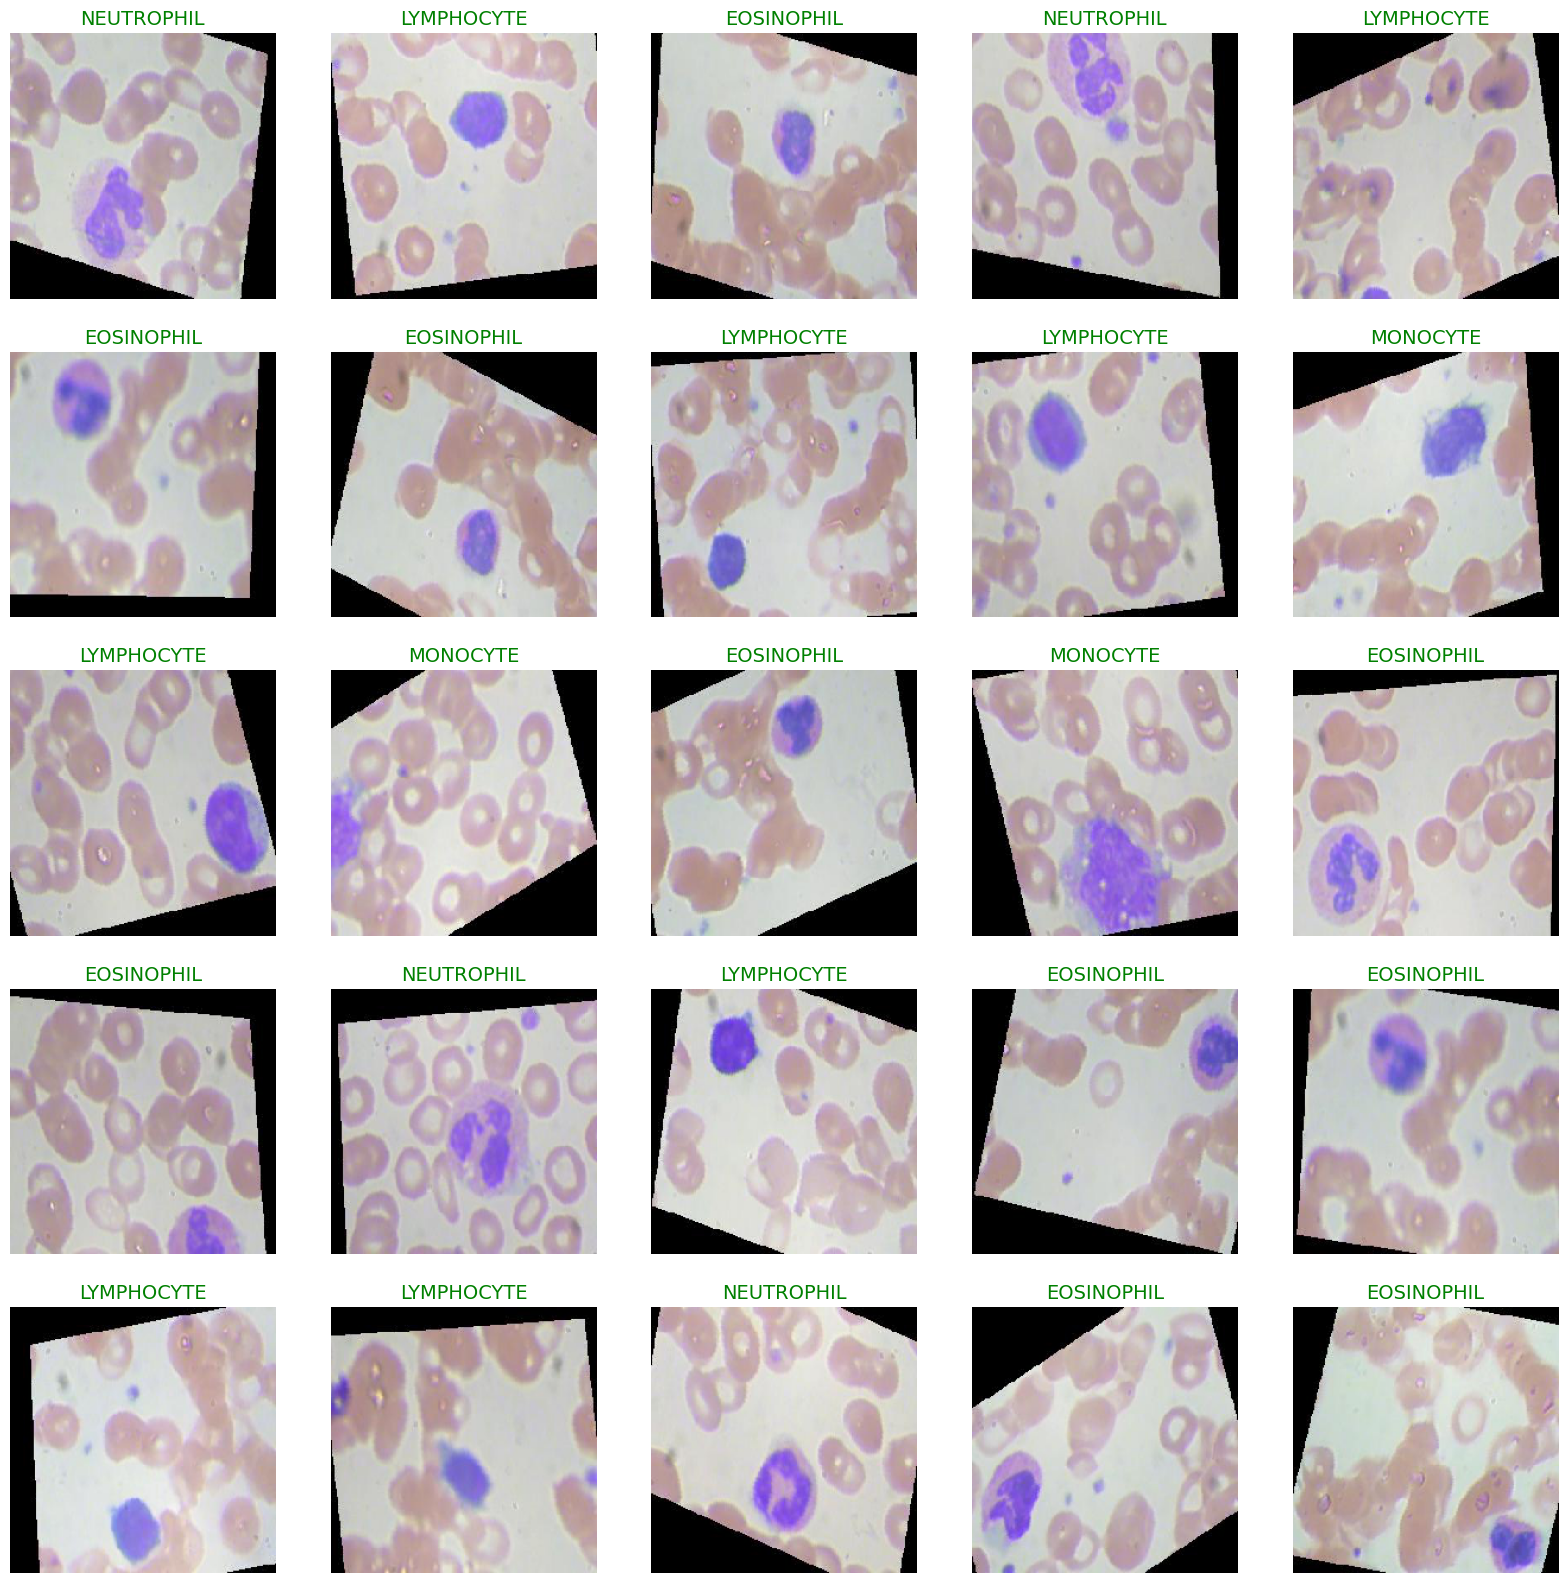

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🔹 Define dataset path (use raw string for Windows)
data_dir = r"C:\Users\INDU\OneDrive\Music\dataset2-master\dataset2-master\images\TRAIN"

# 🔹 Create Image Generator
train_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# 🔹 Function to visualize images
def show_knee_images(image_gen):
    class_dict = image_gen.class_indices
    classes = list(class_dict.keys())
    
    images, labels = next(image_gen)

    plt.figure(figsize=(20,20))
    
    r = min(len(labels), 25)

    for i in range(r):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        
        index = np.argmax(labels[i])
        class_name = classes[index]
        
        plt.title(class_name, color="green", fontsize=14)
        plt.axis('off')

    plt.show()

# 🔹 Call function
show_knee_images(train)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

In [12]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print (train_images.shape)

(7965, 2)
(2988, 2)
(1992, 2)
(6969, 2)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
import tensorflow as tf


In [15]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe = train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode="rgb",
                                      class_mode="categorical",
                                      batch_size=8, 
                                      shuffle = False
                                     )
test = image_gen.flow_from_dataframe(dataframe = test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode="rgb", 
                                     class_mode="categorical",
                                     batch_size=8,
                                     shuffle = False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= "rgb", 
                                    class_mode="categorical",
                                    batch_size=8,
                                    shuffle = False
                                   )

Found 7965 validated image filenames belonging to 4 classes.
Found 2988 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


In [1]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.Input(shape=(224, 224, 3)),

    keras.layers.Conv2D(128, (8, 8), strides=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, (5, 5), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((3, 3)),

    keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, (1, 1), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(256, (1, 1), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(512, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Conv2D(512, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(512, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Conv2D(512, (3, 3), padding="same", activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 512)         │           2,0

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [17]:
history=model.fit(train,epochs=5,validation_data=val,verbose=1) 

Epoch 1/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 26528s 27s/step - accuracy: 0.3603 - loss: 1.6312 - val_accuracy: 0.5607 - val_loss: 1.0330
Epoch 2/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 6849s 7s/step - accuracy: 0.5159 - loss: 1.0998 - val_accuracy: 0.6772 - val_loss: 0.7797
Epoch 3/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 8368s 8s/step - accuracy: 0.6728 - loss: 0.7720 - val_accuracy: 0.7851 - val_loss: 0.5271
Epoch 4/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 5107s 5s/step - accuracy: 0.7947 - loss: 0.5148 - val_accuracy: 0.8554 - val_loss: 0.3777
Epoch 5/5
996/996 ━━━━━━━━━━━━━━━━━━━━ 7226s 7s/step - accuracy: 0.8613 - loss: 0.3546 - val_accuracy: 0.9016 - val_loss: 0.2594


In [18]:
history1=model.fit(train, epochs=1, validation_data=val, verbose=1) 


996/996 ━━━━━━━━━━━━━━━━━━━━ 9121s 9s/step - accuracy: 0.8962 - loss: 0.2600 - val_accuracy: 0.9428 - val_loss: 0.1499


In [20]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest probability
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

374/374 ━━━━━━━━━━━━━━━━━━━━ 317s 844ms/step


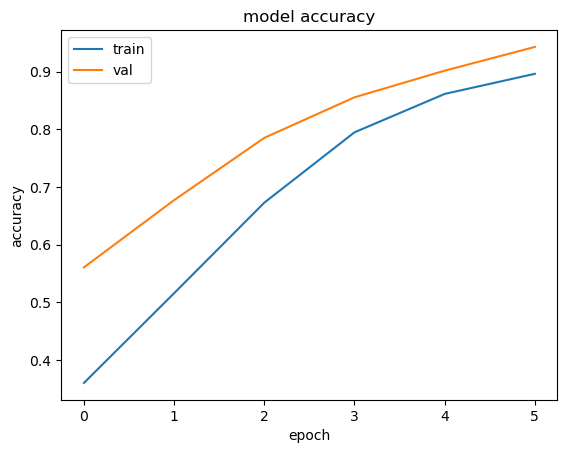

In [21]:
plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

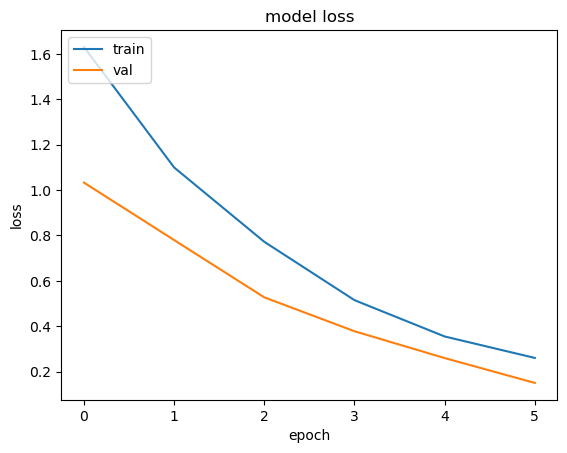

In [22]:
plt.plot(history.history['loss'] + history1.history['loss'])
plt.plot(history.history['val_loss'] + history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:", "{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

  eosinophil       0.90      0.91      0.91       771
  lymphocyte       0.99      0.99      0.99       765
    monocyte       1.00      0.99      1.00       728
  neutrophil       0.91      0.91      0.91       724

    accuracy                           0.95      2988
   macro avg       0.95      0.95      0.95      2988
weighted avg       0.95      0.95      0.95      2988

Accuracy of the Model: 95.0%


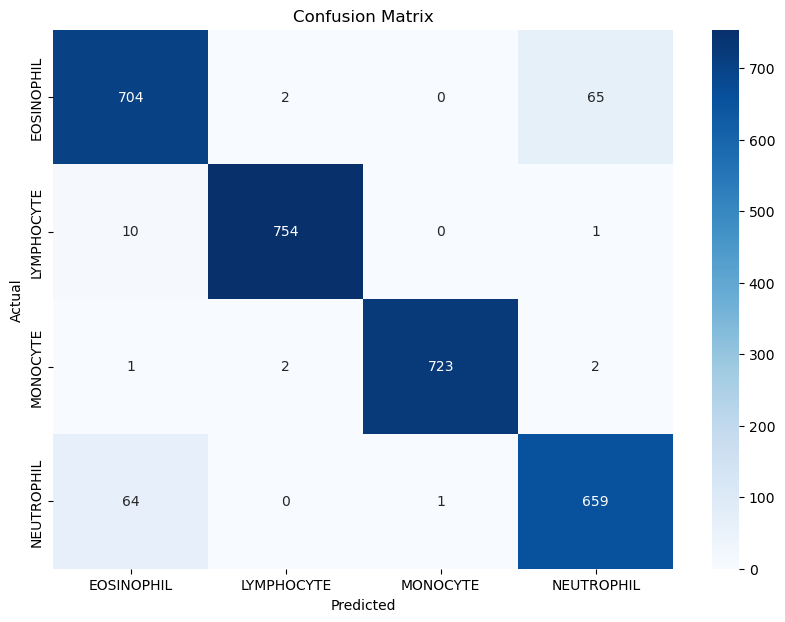

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', "NEUTROPHIL"]
cm = confusion_matrix(y_test, pred2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')
plt.xticks (ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks (ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("Blood_cell.h5")